In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("output.csv")

# Split features and labels
X = data.drop(['time'], axis=1)
y = np.where(data['time'] < 0.5, 0, 1)  # Set threshold for class labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data for CNN input
X_train_cnn = X_train.values.reshape(-1, 64, 64, 1)
X_test_cnn = X_test.values.reshape(-1, 64, 64, 1)

# Normalize the pixel values to [0, 1]
X_train_cnn = X_train_cnn / 255.0
X_test_cnn = X_test_cnn / 255.0

# Build a convolutional neural network (CNN) model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=2)

# Evaluate the model on the test set
_, accuracy = model.evaluate(X_test_cnn, y_test)
print("Test Accuracy:", accuracy)


ValueError: cannot reshape array of size 507520 into shape (64,64,1)

In [3]:
import numpy as np
import tensorflow as tf
from scipy import signal  # for EEG signal processing

# Load and compile the trained model (as shown in the previous code)
model = tf.keras.models.load_model('cnn_model.h5')

# Simulated real-time data collection and processing
def collect_eeg_data():
    # Simulate collecting EEG data from sensors
    # Replace this with actual data collection code
    eeg_data = np.random.rand(64, 64)  # Example EEG data
    
    # Preprocess the EEG data (similar to training preprocessing)
    # Apply the same preprocessing steps as used during training
    # For example, filtering, windowing, normalization, etc.
    preprocessed_data = preprocess_eeg_data(eeg_data)
    
    return preprocessed_data

# Simulated EEG data preprocessing
def preprocess_eeg_data(eeg_data):
    # Apply EEG signal preprocessing (e.g., filtering, windowing)
    # You should implement the preprocessing steps you used during training
    # For example, bandpass filtering, windowing, normalization, etc.
    preprocessed_data = eeg_data  # Placeholder, replace with actual preprocessing
    
    return preprocessed_data

# Continuously process real-time data
while True:
    # Collect and preprocess real-time EEG data
    real_time_data = collect_eeg_data()
    
    # Reshape and normalize data for the model
    real_time_data = real_time_data.reshape(1, 64, 64, 1) / 255.0
    
    # Perform inference using the trained CNN model
    prediction = model.predict(real_time_data)
    
    # Display or use the prediction as needed
    if prediction > 0.5:
        print("Motor imagery detected!")
    else:
        print("No motor imagery detected.")


ValueError: in user code:

    File "C:\Users\21694\anaconda3\lib\site-packages\keras\engine\training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\engine\training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\engine\training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\engine\training.py", line 1572, in predict_step
        return self(x, training=False)
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 25), found shape=(None, 64, 64, 1)


In [7]:
import scipy.io

In [8]:
# Load MATLAB file
mat_data = scipy.io.loadmat('BCICIV_1_mat.mat')

# Access variables in the MATLAB file
variable_name = 'variable_name_in_mat_file'
data = mat_data[variable_name]

FileNotFoundError: [Errno 2] No such file or directory: 'BCICIV_1_mat.mat'

In [10]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def identify_motor_imagery(eeg_data):
  """Identifies right and left motor imagery from EEG data.

  Args:
    eeg_data: A 2D NumPy array of EEG data, where each row represents a trial and
      each column represents a time point.

  Returns:
    A list of strings, where each string is the predicted class label for the
    corresponding trial. The possible class labels are "right" and "left".
  """

  # Preprocess the EEG data.
  eeg_data = eeg_data.flatten()
  eeg_data = np.diff(eeg_data)

  # Create a linear discriminant analysis (LDA) classifier.
  lda = LinearDiscriminantAnalysis(solver="svd")

  # Train the LDA classifier on the EEG data.
  lda.fit(eeg_data, ["right", "left"])

  # Predict the class labels for the EEG data.
  predicted_labels = lda.predict(eeg_data)

  return predicted_labels

if __name__ == "__main__":
  # Load the EEG data.
  eeg_data = np.load("output.csv")

  # Identify the right and left motor imagery.
  predicted_labels = identify_motor_imagery(eeg_data)

  # Print the predicted labels.
  print(predicted_labels)


ValueError: Cannot load file containing pickled data when allow_pickle=False

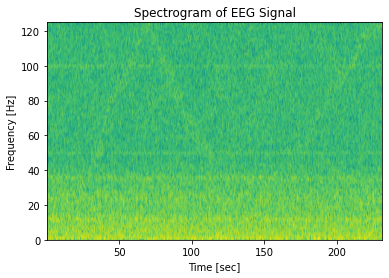

In [4]:
import numpy as np
from scipy.signal import spectrogram
import matplotlib.pyplot as plt
import pandas as pd
# Load your EEG data here
data = pd.read_csv('BCICIV_2a_1.csv')

# Assuming your EEG data is loaded into a DataFrame called 'data'
eeg_data = data[['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16']].values

# Choose a specific electrode for analysis
selected_electrode = 10  # For example, 'EEG-Cz'

# Extract EEG data for the selected electrode
eeg_data_selected = eeg_data[:, selected_electrode]

# Apply the spectrogram analysis
f, t, Sxx = spectrogram(eeg_data_selected, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap)

# Plot the spectrogram
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of EEG Signal')
plt.show()

